In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency 
from scipy.stats.contingency import association
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv("../amz_uk_processed_data.csv")

In [3]:
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


# Parte 1


- 1.1

In [5]:
# Tabla para indexar los libros por categoria son best seller
best_seller_crosstab = pd.crosstab(index=df['categoryName'], columns=df['isBestSeller'], normalize='index')
best_seller_crosstab

isBestSeller,False,True
categoryName,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999503,0.000497
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,1.000000,0.000000
Adapters,0.988048,0.011952
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988762,0.011238


In [6]:
best_seller_crosstab_orden = best_seller_crosstab.sort_values(by=True,ascending=False)
best_seller_crosstab_orden.head()

isBestSeller,False,True
categoryName,,
Health & Personal Care,0.941105,0.058895
Grocery,0.950135,0.049865
Mobile Phone Accessories,0.960630,0.039370
Power & Hand Tools,0.962355,0.037645
"Billiard, Snooker & Pool",0.967871,0.032129


Las categorias con mayor porcentage de ser un Best Seller son ***Health & Personal Care***,  ***Grocery***,  ***Mobile Phone Accessories***,  ***Power & Hand Tools*** y  ***Billiard, Snooker & Pool***

- 1.2

- Chi-square

In [7]:
contingence = pd.crosstab(index=df['categoryName'], columns=df['isBestSeller']) 

In [8]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(contingence)

In [9]:
chi2_statistic, chi2_p_value

(np.float64(33019.04971964154), np.float64(0.0))

- Cramer's

In [10]:
cramers = association (contingence, method="cramer")
cramers

0.1218814906639688

- 1.3

- Visualizacion

<Axes: xlabel='categoryName'>

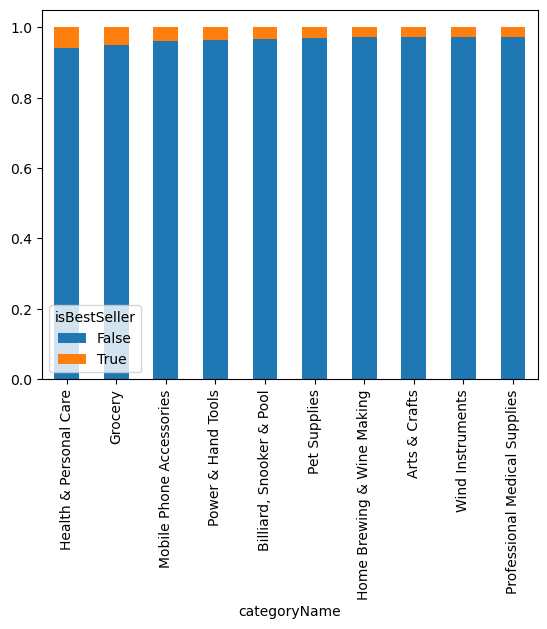

In [11]:
best_seller_crosstab_orden.head(10).plot(kind='bar', stacked=True)

# Parte 2

- 2.0

In [12]:
# Calculo de cuartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
# Limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
# Filtro
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [15]:
print(len(df))
print((len(df_clean)))

2222742
1918647


- 2.1 Violin plot

In [16]:
# Filtro de 20 categorias
top_20_categories = df_clean['categoryName'].value_counts().nlargest(20).index

In [17]:
df_top_20 = df_clean[df_clean['categoryName'].isin(top_20_categories)]


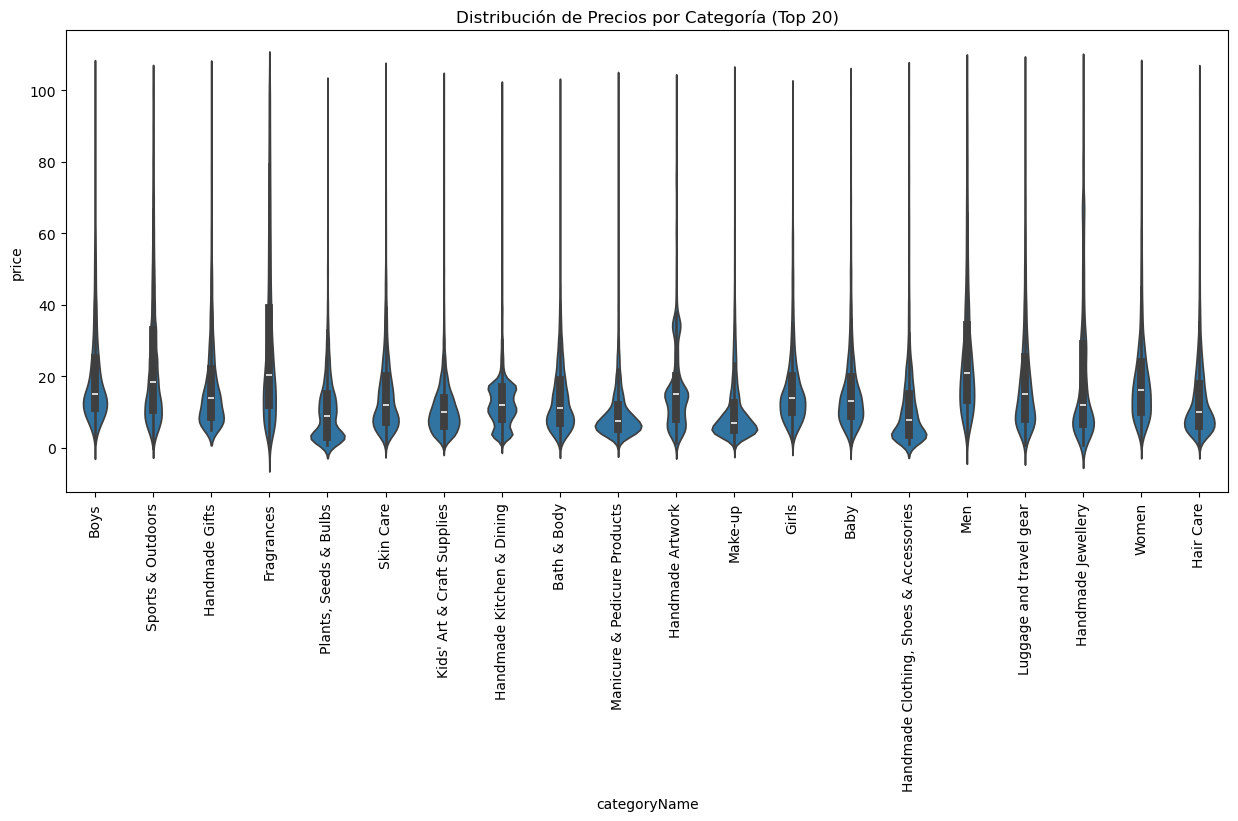

In [18]:
# Visualizacion
plt.figure(figsize=(15, 6))
sns.violinplot(x='categoryName', y='price', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Categoría (Top 20)')
plt.show()

- Agrupamos todas las categorías (sin filtrar df_top_20) y sacamos la mediana

In [19]:
categoria_mas_alta = df_clean.groupby('categoryName')['price'].median().sort_values(ascending=False).head(1)
print("La categoría con la mediana de precio más alta es:")
print(categoria_mas_alta)

La categoría con la mediana de precio más alta es:
categoryName
Desktop PCs    75.0
Name: price, dtype: float64


- 2.2 Barchart

In [20]:
media_precio_cat = df_clean.groupby('categoryName')['price'].mean().sort_values(ascending=False)

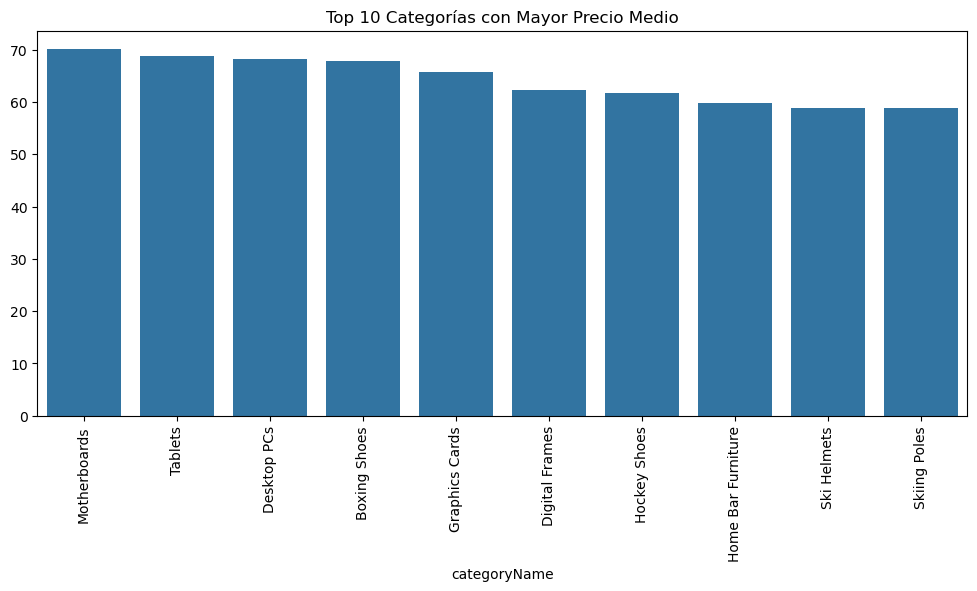

In [21]:
top_10_medias = media_precio_cat.head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_medias.index, y=top_10_medias.values)
plt.xticks(rotation=90)
plt.title('Top 10 Categorías con Mayor Precio Medio')
plt.show()

In [22]:
print(f"La categoría más cara de media es: {top_10_medias.index[0]}")

La categoría más cara de media es: Motherboards


- 2.3 Box plots

In [23]:

# Filtramos las Top 10 categorías por cantidad de productos
top_10_cantidad_cat = df_clean['categoryName'].value_counts().head(10).index
df_top_10_ratings = df_clean[df_clean['categoryName'].isin(top_10_cantidad_cat)]

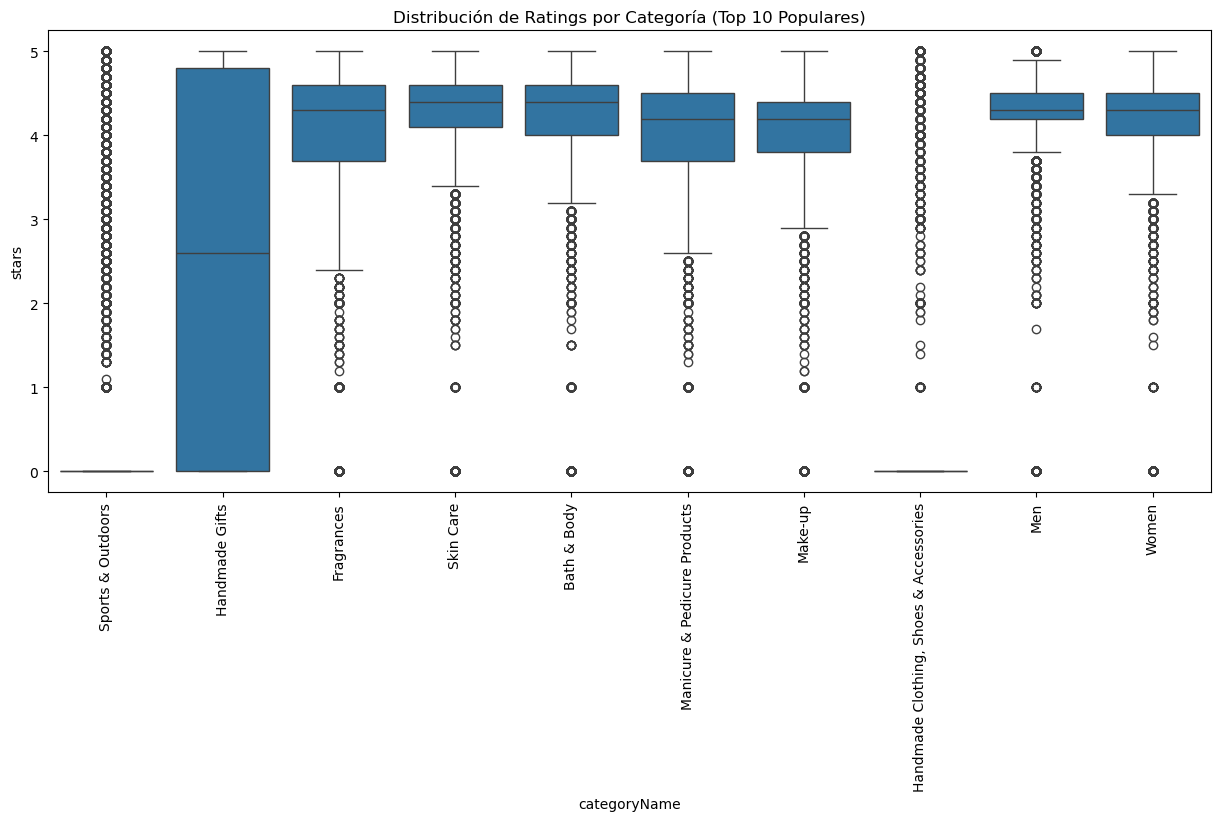

In [24]:
# Visualizacion
plt.figure(figsize=(15, 6))
sns.boxplot(x='categoryName', y='stars', data=df_top_10_ratings)
plt.xticks(rotation=90)
plt.title('Distribución de Ratings por Categoría (Top 10 Populares)')
plt.show()

In [25]:
# Calculamos la mediana de stars para todas las categorías
best_ratin_cat = df_clean.groupby('categoryName')['stars'].median().sort_values(ascending=False).head(1)
print(f"La categoría con mejores ratings medianos es:\n{best_ratin_cat}")

La categoría con mejores ratings medianos es:
categoryName
Computer Memory    4.7
Name: stars, dtype: float64


# Parte 3

- 3.1 Coeficientes de correlacion

In [26]:
# Calculamos la correlación entre price y stars
corr = df_clean['price'].corr(df_clean['stars'])
print(f"Coeficiente de correlación Precio vs Stars: {corr}")

Coeficiente de correlación Precio vs Stars: -0.0661732399075106


- El precio y las estrellas no tienen correlacion segun el coeficiente de correlacion

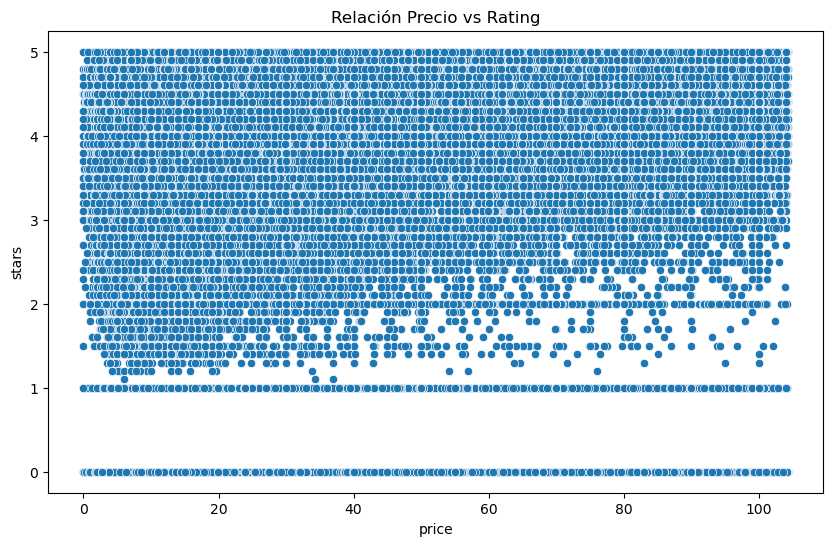

In [27]:
# 3.2 Visualizacion

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean,x='price', y='stars')
plt.title('Relación Precio vs Rating')
plt.show()

No existe ninguna correlacion entre le precio como se demuestra en la grafica. Los puntos estan dispersos por toda la grafica

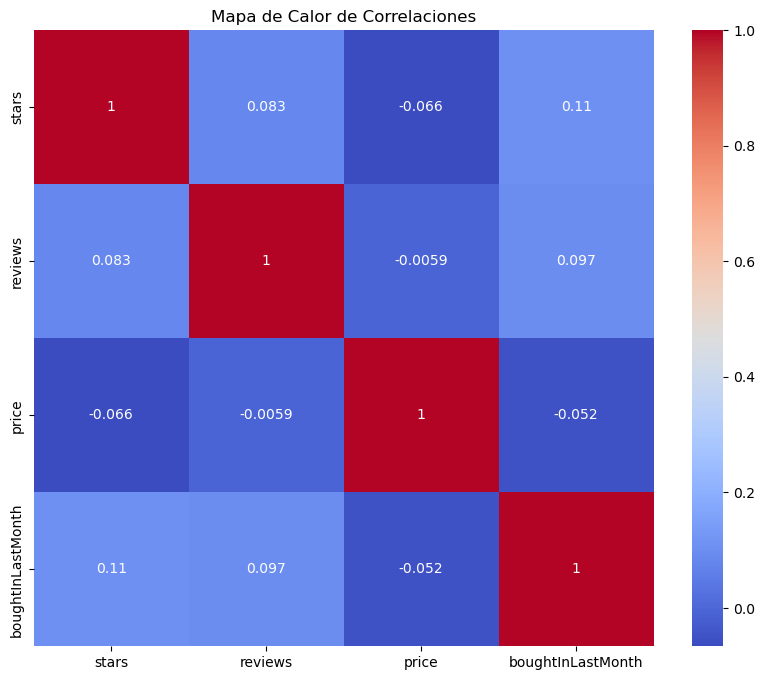

In [28]:
# HeatMap

plt.figure(figsize=(10, 8))
corr_matrix = df_clean.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


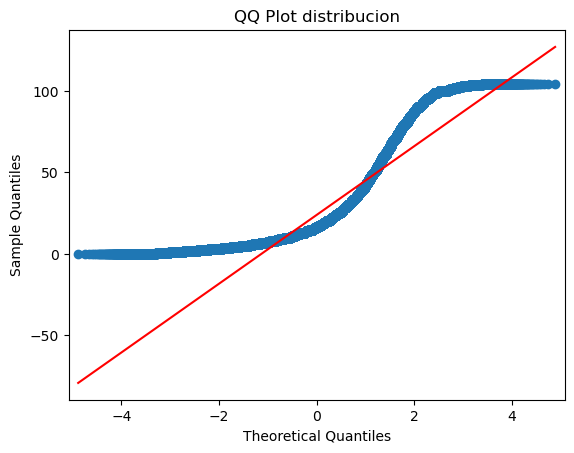

In [29]:
## QQ Plot

sm.qqplot(df_clean['price'], line='s')
plt.title('QQ Plot distribucion')
plt.show()

# SUBMISSION
 Conclusiones del Análisis:
1. ¿Importa la categoría para ser un Best Seller?
Sí, pero poco.
El test estadístico (Chi-cuadrado) confirma que hay relación, pero es muy débil (Cramér's V de 0.12).
Las categorías que más triunfan son productos de consumo diario como Health & Personal Care y Grocery.
- Conclusión: La categoría ayuda, pero no te garantiza el éxito. Seguramente influye más la marca o el marketing.
2. Precios y Outliers:
He tenido que limpiar bastantes valores extremos (~13% de los datos) para que el análisis fuera real.
En mediana, lo más caro son los Desktop PCs.
En media, ganan las Motherboards (seguramente por modelos de gama muy alta que suben el promedio).
3. ¿Pagar más da mejores reviews?:
No. La correlación entre Precio y Stars es prácticamente CERO (-0.06).
lo mejor valorado es la Computer Memory (RAM).

# Bonus

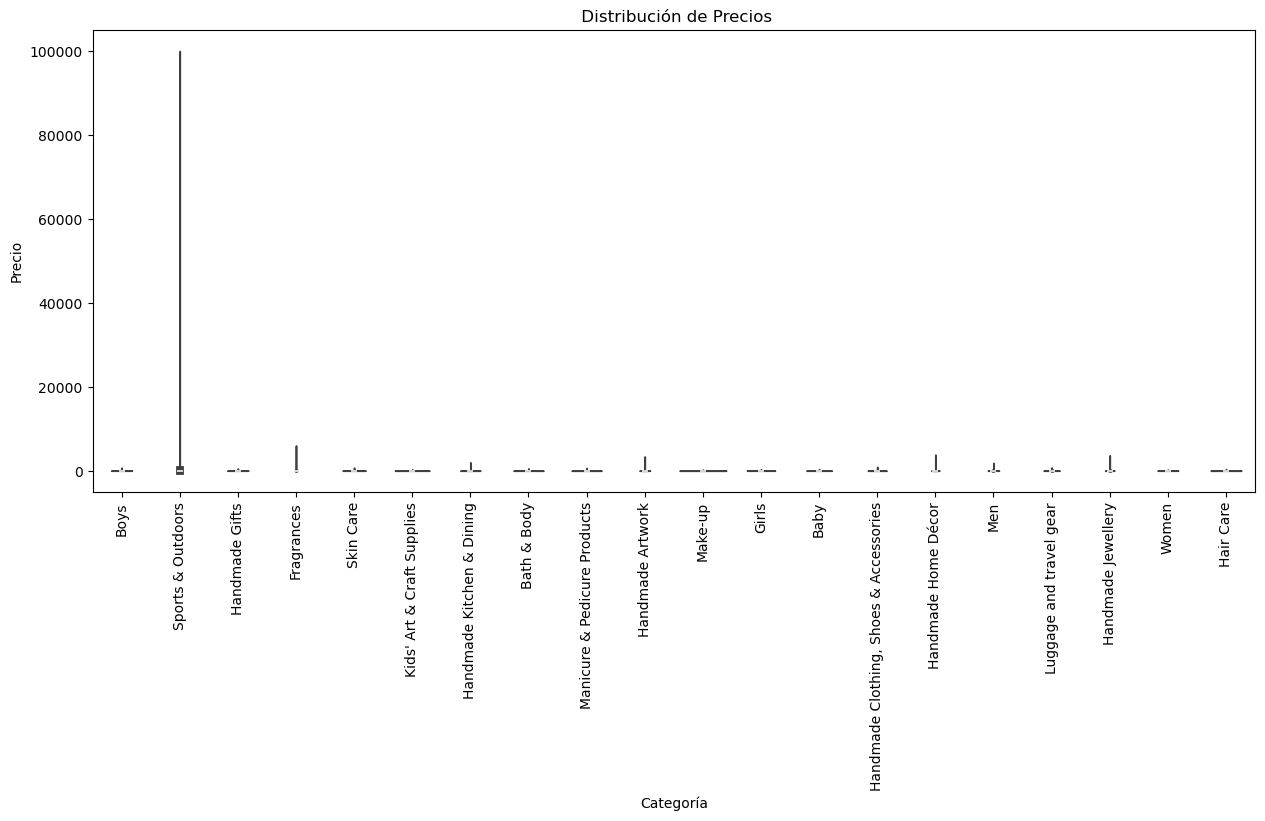

In [30]:
# Violin Plot 
top_20_bonus = df['categoryName'].value_counts().nlargest(20).index
df_bonus_top_20 = df[df['categoryName'].isin(top_20_bonus)]
plt.figure(figsize=(15, 6))
sns.violinplot(x='categoryName', y='price', data=df_bonus_top_20)
plt.xticks(rotation=90)
plt.title(' Distribución de Precios')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.show()

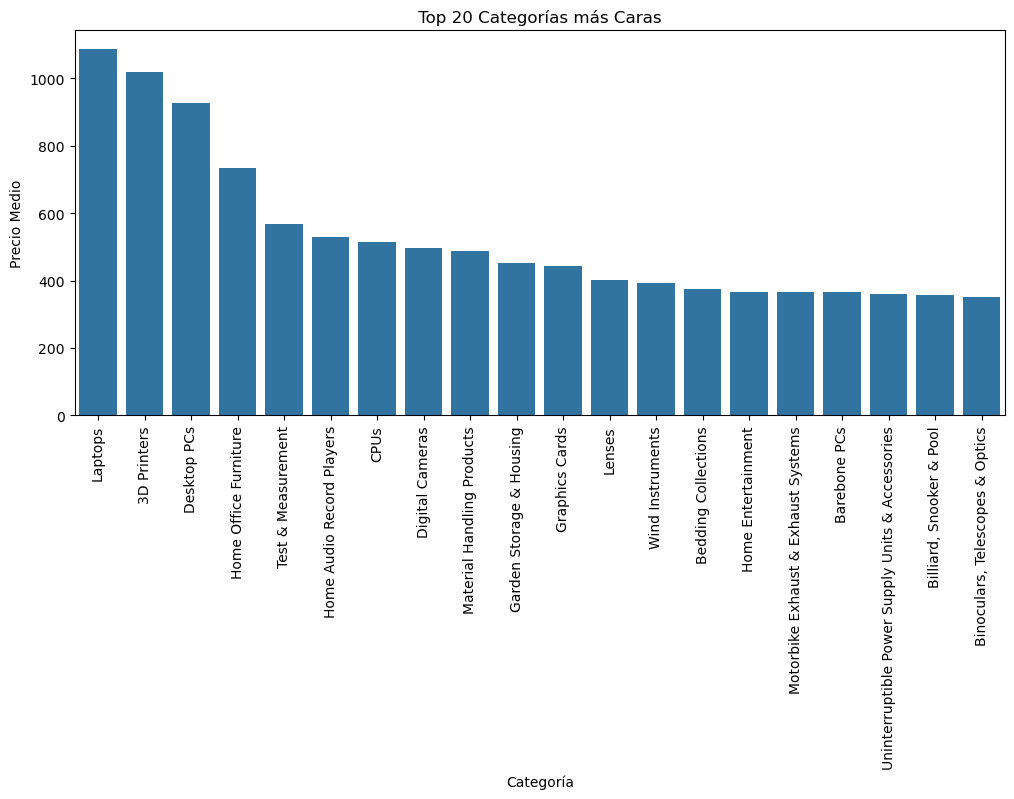

In [31]:
# Bar Chart 

media_price_bonus = df.groupby('categoryName')['price'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 5))
sns.barplot(x=media_price_bonus.index, y=media_price_bonus.values)
plt.xticks(rotation=90)
plt.title(' Top 20 Categorías más Caras ')
plt.xlabel('Categoría')
plt.ylabel('Precio Medio')
plt.show()

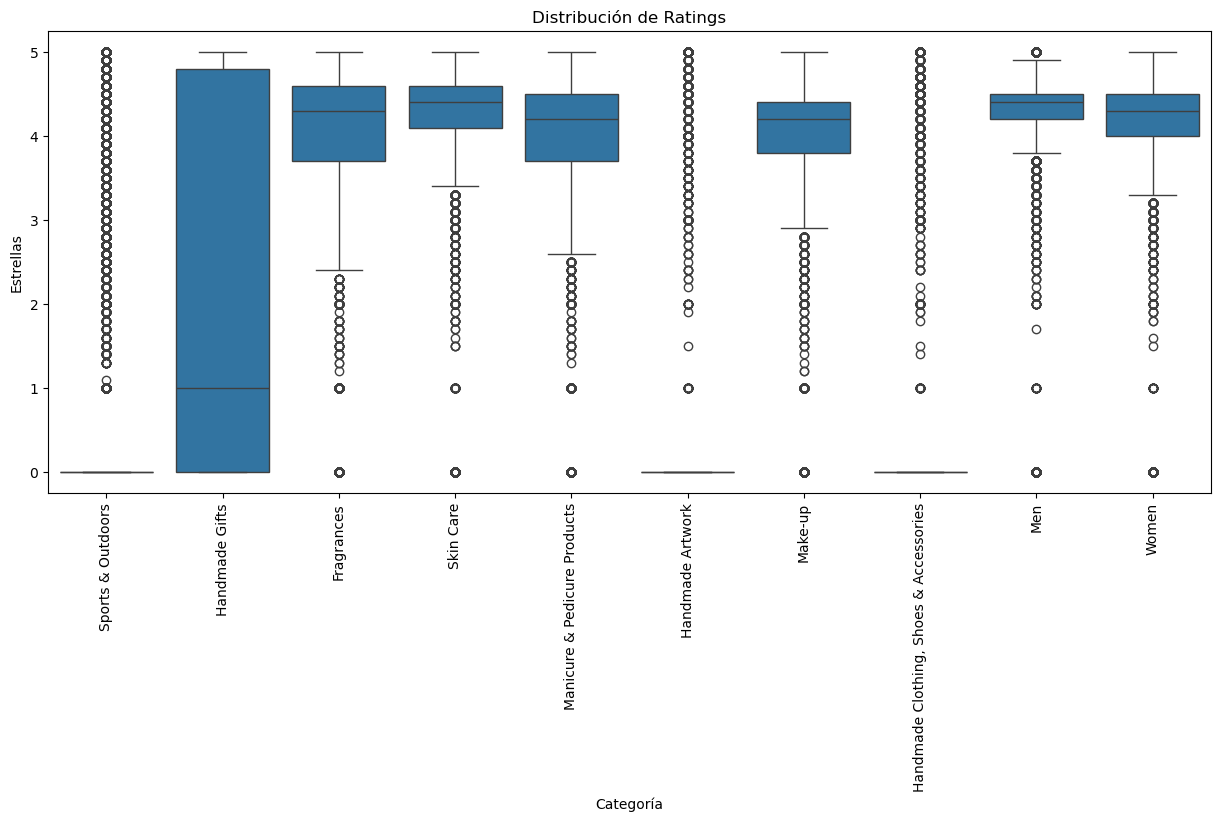

In [32]:
# Box Plot
top_10_cantidad_bonus = df['categoryName'].value_counts().head(10).index
df_bonus_top_10_ratings = df[df['categoryName'].isin(top_10_cantidad_bonus)]
plt.figure(figsize=(15, 6))
sns.boxplot(x='categoryName', y='stars', data=df_bonus_top_10_ratings)
plt.xticks(rotation=90)
plt.title('Distribución de Ratings')
plt.xlabel('Categoría')
plt.ylabel('Estrellas')
plt.show()

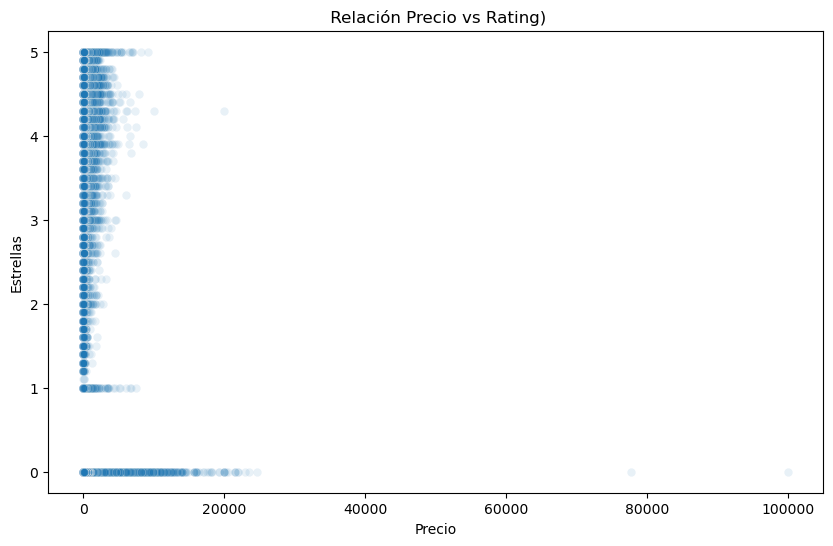

In [33]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df, alpha=0.1)
plt.title(' Relación Precio vs Rating)')
plt.xlabel('Precio')
plt.ylabel('Estrellas')
plt.show()

In [34]:
#  Correlación Numérica
corr_raw = df['price'].corr(df['stars'])
print(f"BONUS: Correlación Precio vs Stars (Con Outliers): {corr_raw}")

BONUS: Correlación Precio vs Stars (Con Outliers): -0.12250520638885651


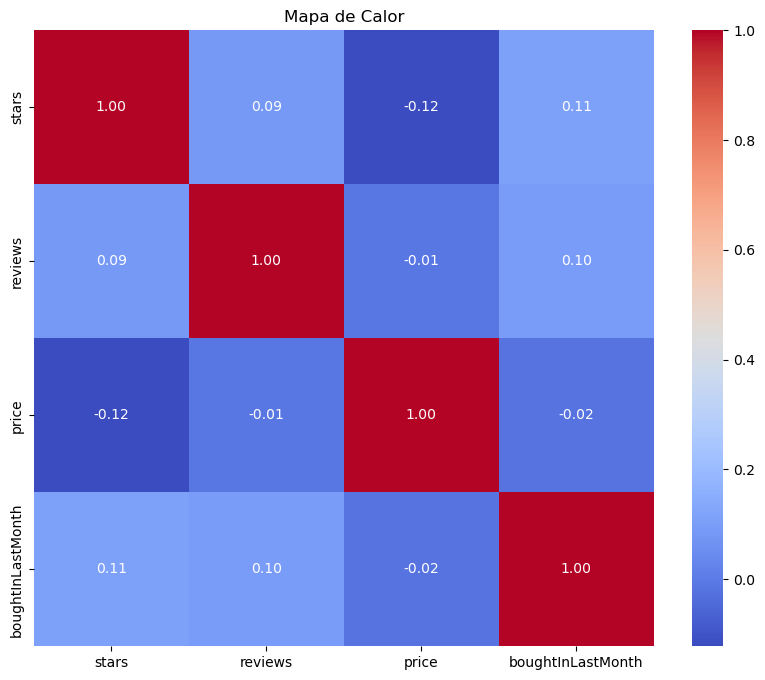

In [35]:
# Heatmap Completo
plt.figure(figsize=(10, 8))
heatmap_df_bonus = df.select_dtypes(include=['number'])
corr_matrix_bonus = heatmap_df_bonus.corr()
sns.heatmap(corr_matrix_bonus, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor')
plt.show()

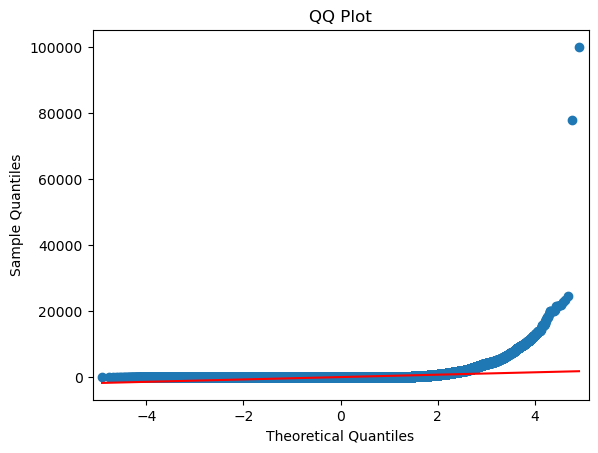

In [36]:
# QQ-Plot 
sm.qqplot(df['price'], line='s')
plt.title('QQ Plot')
plt.show()